# Double32

Notebook that illustrates the use and precision of the `Double32_t` data type.

This is intended to be executed with [ACLIC](https://root.cern.ch/drupal/content/compiling-your-code-also-known-aclic).

The following cases are supported for streaming a `Double32_t` type depending on the range declaration in the comment field of the data member:
1. `Double32_t fNormal;`
2. `Double32_t fTemperature;` *// [0,100]*
3. `Double32_t fCharge;`      *// [-1,1,2]*
4. `Double32_t fVertex[3];`   *// [-30,30,10]*
5. `Double32_t fChi2;`        *// [0,0,6]*
6. `Int_t fNsp;  Double32_t* fPointValue;`      *// [fNsp][0,3]*

In the previous cases:
1. `fNormal` is converted from a `Double_t` to a `Float_t`.
2. `fTemperature` is converted to a 32 bit unsigned integer.
3. `fCharge` is converted to a 2 bits unsigned integer.
4. The array elements of `fVertex` are converted to an unsigned 10 bits integer.
5. `fChi2` is converted to a `Float_t` with truncated precision at 6 bits.
6. The `fNsp` elements of array `fPointvalue` are converted to an unsigned 32 bit integer.

Note that the range specifier must follow the dimension specifier. Case 2 has more precision (9 to 10 significative digits than case 1 (6 to 7 digits).

The range specifier has the general format: $[xmin,xmax]$ or $[xmin,xmax,nbits]$. Examples:
- $[0,1]$
- $[-10,100]$
- $[-pi,pi], [-pi/2,pi/4],[-2pi,2*pi]$
- $[-10,100,16]$
- $[0,0,8]$

If `nbits` is not specified, or if `nbits` <2 or `nbits`>32, `nbits` is set to 32. if (`xmin`==0 and `xmax`==0 and `nbits` <=14) the double word will be converted to a float and its mantissa truncated to nbits significative bits.

### IMPORTANT NOTE
Lets assume an original variable double `x`. When using the format $[0,0,8]$ (i.e. range not specified) you get the best relative precision when storing and reading back the truncated `x`, say `xt`. The variance of $(x-xt)/x$ will be better than when specifying a range for the same number of bits. However the precision relative to the range $(x-xt)/(xmax-xmin)$ will be worse, and vice-versa. The format $[0,0,8]$ is also interesting when the range of `x` is infinite or unknown.

---

In [1]:
import ROOT
Math = ROOT.TMath

Welcome to ROOTaaS 6.05/01


Declare a helper class and invoke ACLiC. This allows to transparently build dictionaries for it: they are necessary since several instances of DemoDouble32 will be written on disk.

In [2]:
%%cpp -a
class DemoDouble32  {
private:
    Double_t    fD64;     //reference member with full double precision
    Double32_t  fF32;     //saved as a 32 bit Float_t
    Double32_t  fI32;     //[-pi,pi]    saved as a 32 bit unsigned int
    Double32_t  fI30;     //[-pi,pi,30] saved as a 30 bit unsigned int
    Double32_t  fI28;     //[-pi,pi,28] saved as a 28 bit unsigned int
    Double32_t  fI26;     //[-pi,pi,26] saved as a 26 bit unsigned int
    Double32_t  fI24;     //[-pi,pi,24] saved as a 24 bit unsigned int
    Double32_t  fI22;     //[-pi,pi,22] saved as a 22 bit unsigned int
    Double32_t  fI20;     //[-pi,pi,20] saved as a 20 bit unsigned int
    Double32_t  fI18;     //[-pi,pi,18] saved as a 18 bit unsigned int
    Double32_t  fI16;     //[-pi,pi,16] saved as a 16 bit unsigned int
    Double32_t  fI14;     //[-pi,pi,14] saved as a 14 bit unsigned int
    Double32_t  fI12;     //[-pi,pi,12] saved as a 12 bit unsigned int
    Double32_t  fI10;     //[-pi,pi,10] saved as a 10 bit unsigned int
    Double32_t  fI8;      //[-pi,pi, 8] saved as a  8 bit unsigned int
    Double32_t  fI6;      //[-pi,pi, 6] saved as a  6 bit unsigned int
    Double32_t  fI4;      //[-pi,pi, 4] saved as a  4 bit unsigned int
    Double32_t  fI2;      //[-pi,pi, 2] saved as a  2 bit unsigned int
    Double32_t  fR14;     //[0,  0, 14] saved as a 32 bit float with a 14 bits mantissa
    Double32_t  fR12;     //[0,  0, 12] saved as a 32 bit float with a 12 bits mantissa
    Double32_t  fR10;     //[0,  0, 10] saved as a 32 bit float with a 10 bits mantissa
    Double32_t  fR8;      //[0,  0,  8] saved as a 32 bit float with a  8 bits mantissa
    Double32_t  fR6;      //[0,  0,  6] saved as a 32 bit float with a  6 bits mantissa
    Double32_t  fR4;      //[0,  0,  4] saved as a 32 bit float with a  4 bits mantissa
    Double32_t  fR2;      //[0,  0,  2] saved as a 32 bit float with a  2 bits mantissa

public:
    DemoDouble32() {;}
    void Set(Double_t ref) {
        fD64 = fF32 = fI32 = fI30 = fI28 = fI26 = fI24 = fI22 = fI20 = ref;
        fI18 = fI16 = fI14 = fI12 = fI10 = fI8  = fI6  = fI4  = fI2  = ref;
        fR14 = fR12 = fR10 = fR8  = fR6  = fR4  = fR2  = ref;
    }
};

Info in <TUnixSystem::ACLiC>: creating shared library /home/rw15u099/cernbox/new/tutorials/io/fa923c22_C.so


Create a helper object of the previously declared class.

In [3]:
d = ROOT.DemoDouble32()

Create a tree with 40000 objects of type `DemoDouble32`.

In [4]:
ofile = ROOT.TFile.Open("DemoDouble32.root","recreate")
T = ROOT.TTree("T","DemoDouble32")
bd = T.Branch("d","DemoDouble32",d,4000)
r = ROOT.TRandom3()
xmax = Math.Pi()
xmin = -xmax
n = 40000
for i in xrange(n):
    d.Set(r.Uniform(xmin,xmax))
    T.Fill()
T.Write();

Create the canvas, the frame histogram and the graphs.

In [5]:
c1 = ROOT.TCanvas("c1","c1",800,600)
c1.SetGrid()

branches = bd.GetListOfBranches()
nb = branches.GetEntries()

h = ROOT.TH1F("h","",nb,0,nb)
h.SetMaximum(16)
h.SetStats(0)
h.Draw()

gcx = ROOT.TGraph(nb)
gcx.SetNameTitle("gcx","Compression factor")
gcx.SetMarkerStyle(ROOT.kFullCircle)
gcx.SetMarkerColor(ROOT.kBlue)

gdrange = ROOT.TGraph(nb)
gdrange.SetNameTitle("gdrange","Log of precision wrt range")
gdrange.SetMarkerStyle(ROOT.kFullCircle)
gdrange.SetMarkerColor(ROOT.kRed)

gdval = ROOT.TGraph(nb)
gdval.SetNameTitle("gdval","Log of precision wrt value")
gdval.SetMarkerStyle(ROOT.kFullCircle)
gdval.SetMarkerColor(ROOT.kBlack)

title = ROOT.TPaveLabel(.15,.92,.85,.97,"Double32_t compression and precision","brNDC")
title.SetFillColor(ROOT.kWhite)
title.Draw()

Loop on the tree branches to get the precision and compression factors.

In [6]:
br = branches[0]
zip64 = float(br.GetZipBytes())
cx = 1.
drange = 15.
dval = 15.

for i, br in enumerate(branches):
    brName = br.GetName()
    h.GetXaxis().SetBinLabel(i+1,brName)
    cx = zip64/br.GetZipBytes()
    gcx.SetPoint(i,i+0.5,cx)
    if i > 0:
        T.Draw("(fD64-%s)/(%g)" %(brName,xmax-xmin),"","goff")
        rms = Math.RMS(n,T.GetV1())
        drange = Math.Max(0.,-Math.Log10(rms))
    gdrange.SetPoint(i,i+0.5,drange)
    if i > 0:
        T.Draw("(fD64-%s)/(fD64+0.01)" %brName,"","goff")
        rms = Math.RMS(n,T.GetV1())
        dval = Math.Max(0.,-Math.Log10(rms))
    gdval.SetPoint(i,i+0.5,dval)

Draw the final canvas.

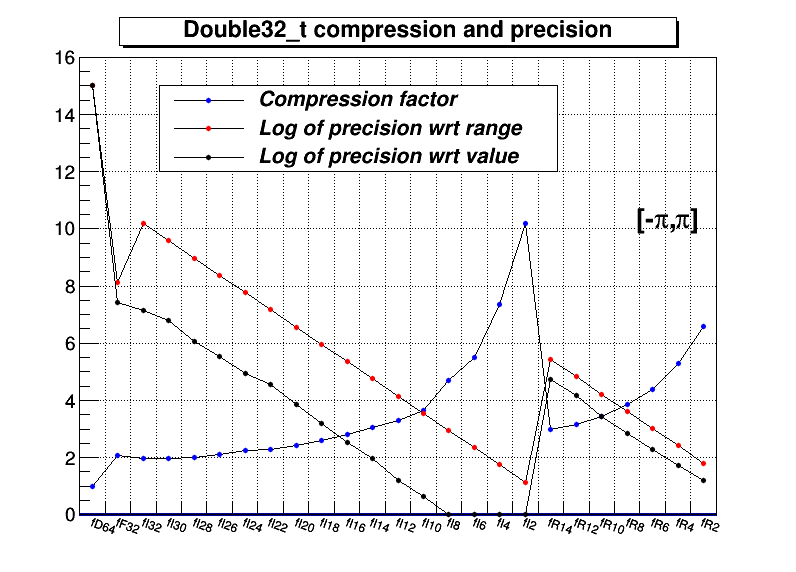

In [7]:
gcx.Draw("lp")
gdrange.Draw("lp")
gdval.Draw("lp")

legend = ROOT.TLegend(0.2,0.7,0.7,0.85)
legend.SetTextFont(72)
legend.SetTextSize(0.04)
for g in (gcx, gdrange, gdval):
    legend.AddEntry(g,"","lp")
legend.Draw()

rang = ROOT.TLatex(.8,.6,"[-#pi,#pi]"); rang.SetNDC()
rang.Draw()

c1.Draw()